## Erstelle aus `lol.csv` einen DataFrame

## Data Cleaning

Die Korrelationskoeffizienten sind *interessant*

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [13]:
plt.rcParams['figure.figsize'] = (35, 20)

In [3]:
df = pd.read_csv("data/lol.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [17]:
df.info()
df = df.drop(columns=["gameId"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

<AxesSubplot: >

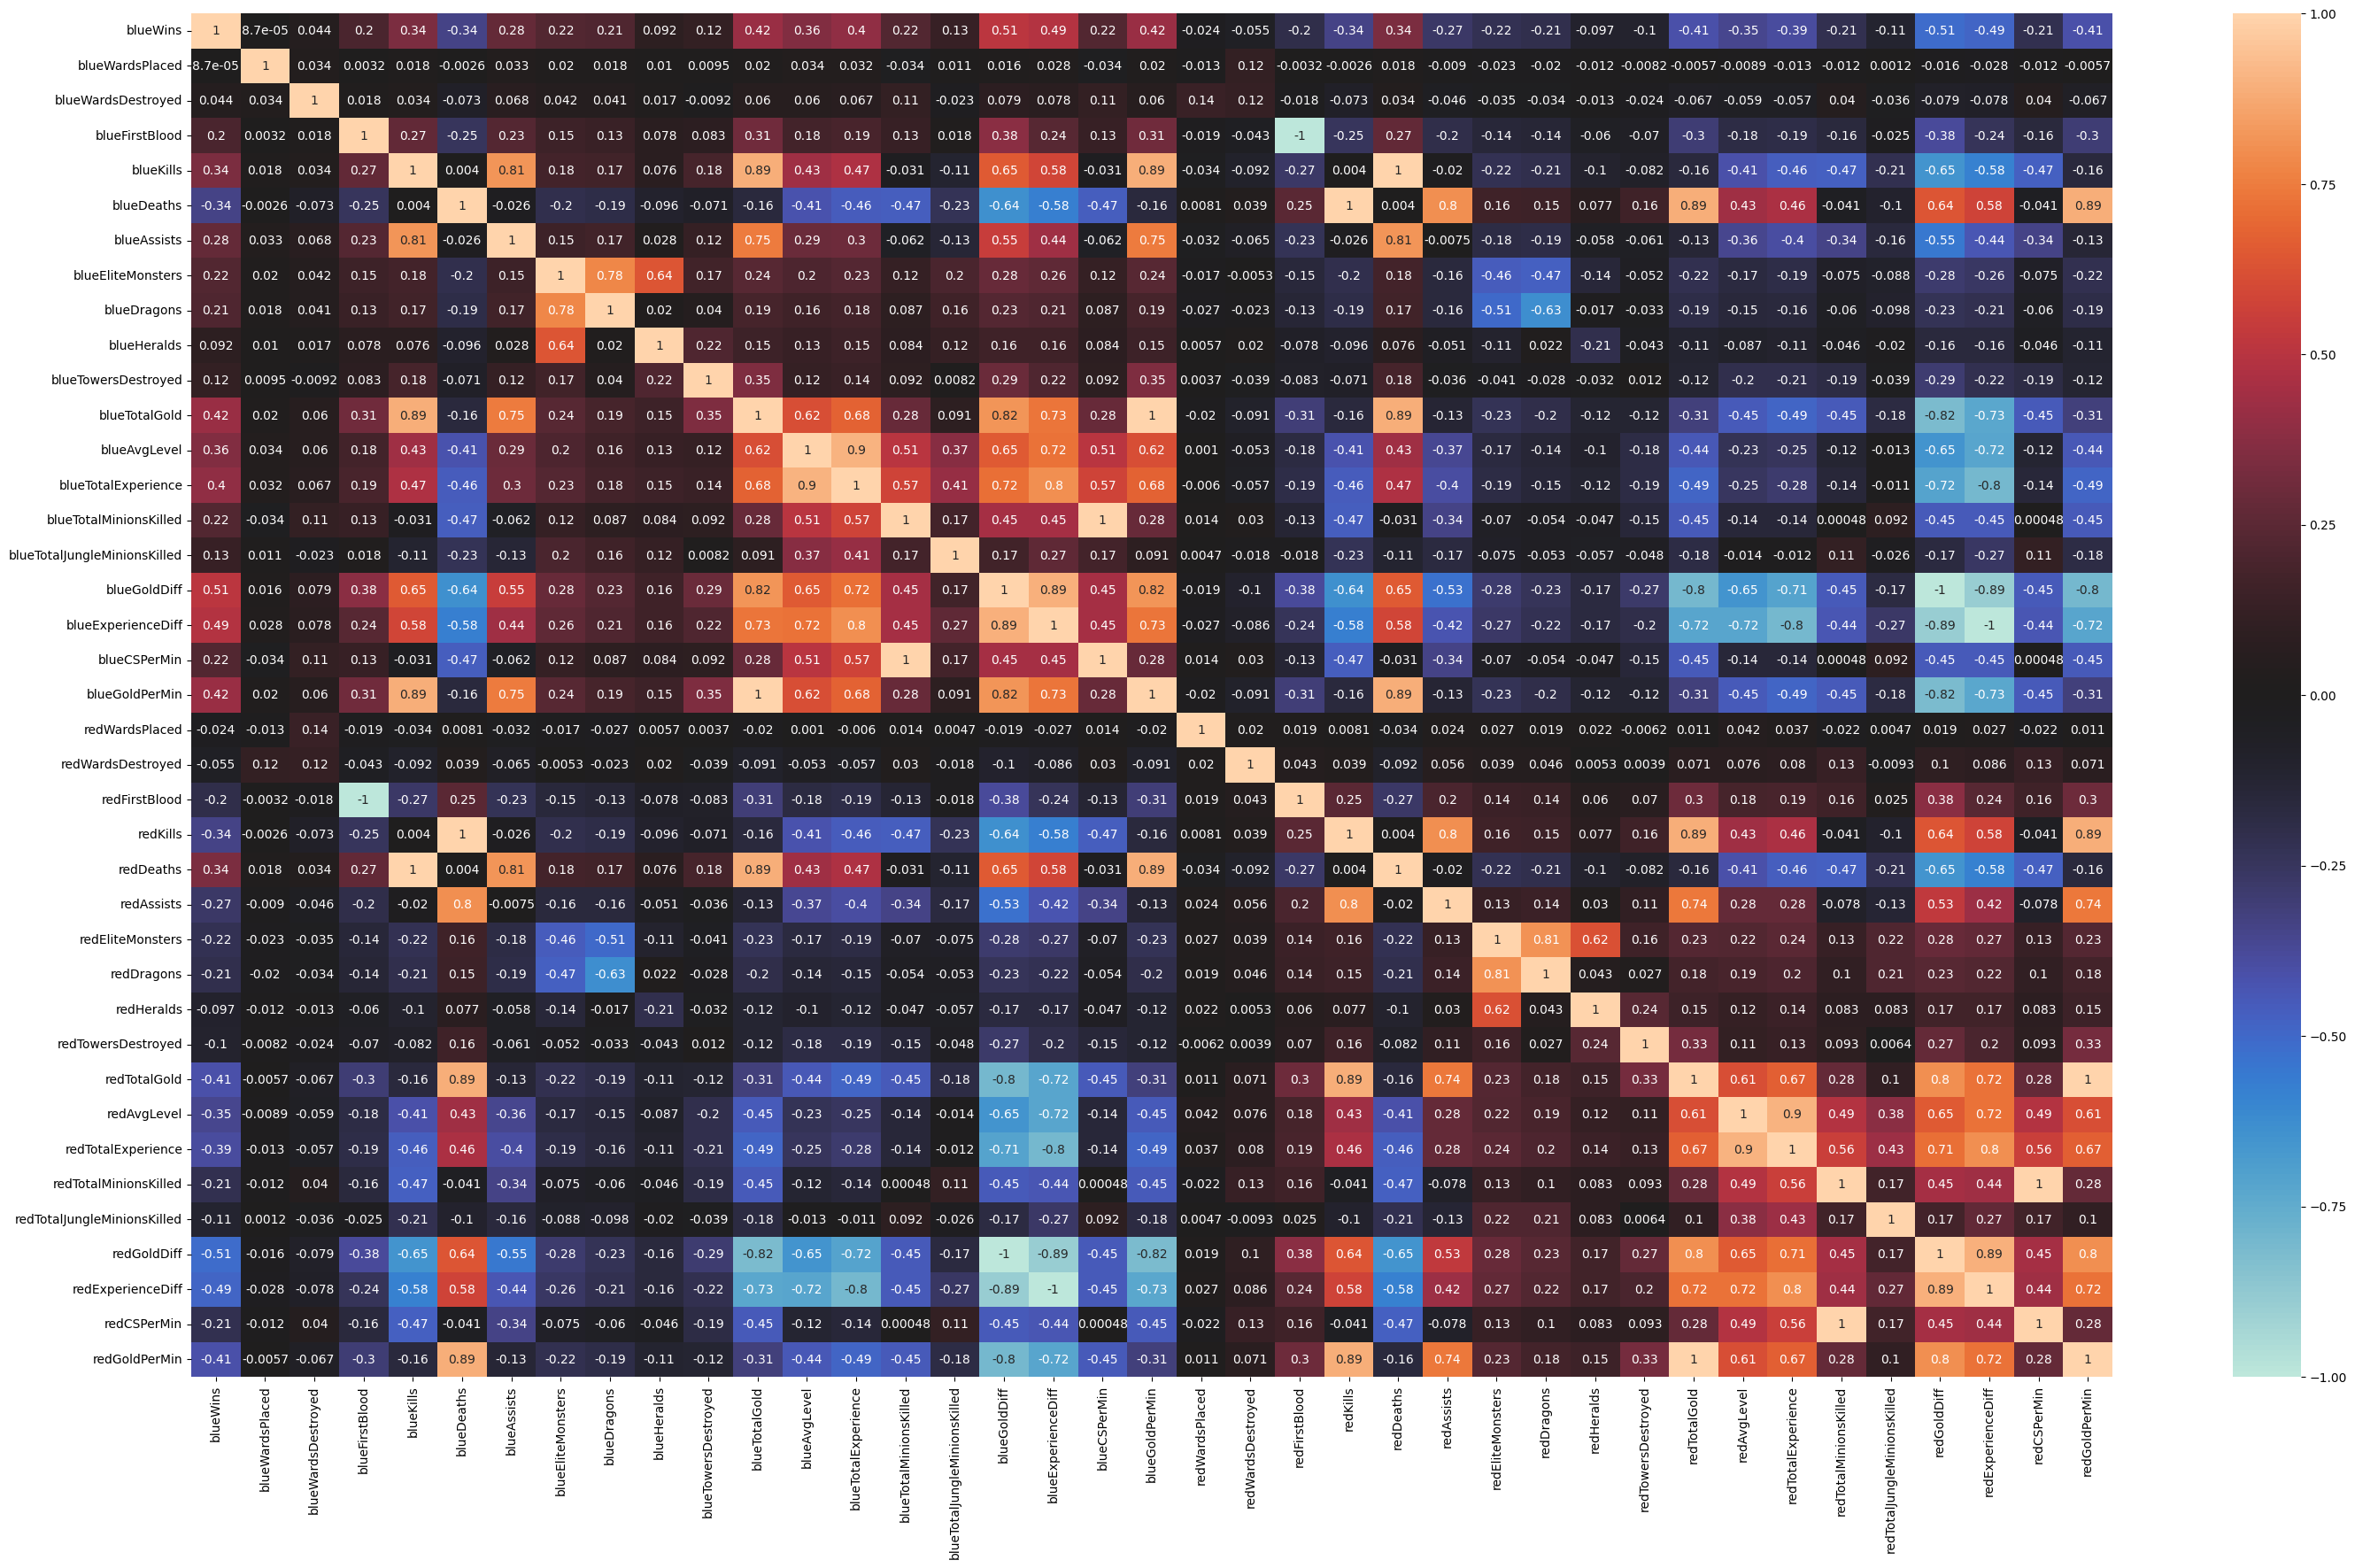

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='icefire')

## Training
* 20% Testdaten
* `random_state=42` sofern unterstützt
* target feature: `blueWins`
* Ziel: score von 0.72

In [20]:
X = df.drop(columns="blueWins")
y = df.blueWins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [ ]:
forest_cv = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions= {
        'n_estimators': randint(1, 1000),
        'max_features': [1.0, 'sqrt', 'log2'],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    },
    n_jobs=2,
    scoring='recall',
    cv=3,
    n_iter=20,
    random_state=42
    )
forest_cv.fit(X_train, y_train)
confusion_matrix(y_train, forest_cv.best_estimator_.predict(X_test))

NameError: name 'confusion_matrix' is not defined